1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).

3) Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.

5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

# homework 2

In [23]:
import random
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statistics
from scipy import stats

# problem1

In [24]:
count1 = 0
n = 10000000
for i in range (0,n):
    dice1 = random.randint(1, 6)
    if dice1 == 1:
        dice2 = random.randint(1, 6)
        if dice2 == 1:
            count1 = count1 +1
pro1 = count1/n
pro1

0.027801

The probability of rolling snake eyes is about 0.027, is about 1/36.

In [25]:
count2 = 0
for i in range (0,n):
    dice1 = random.randint(1, 6)
    dice2 = random.randint(1, 6)
    if dice1 + dice2 == 7:
        count2 = count2 +1
pro2 = count2/n
pro2

0.1667573

The probability of rolling sum to seven is 0.167, is about 1/6.

In [26]:
ratio = pro1/pro2
ratio

0.16671534019800033

The ratio of two probabilities is about 0.16, is about 1/6

# problem2

Text(0.5, 1.0, 'Probability for sum outcomes of two dice')

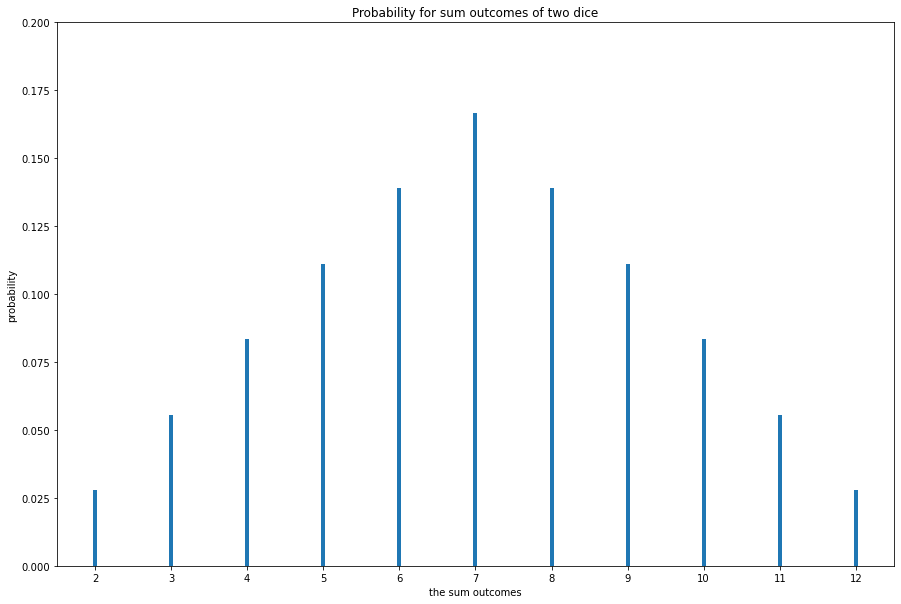

In [28]:
plt.rcParams["figure.figsize"] = (15,10)
pros = np.array([1/6] * 6) #
pros
sumP = np.convolve(pros, pros)
sumP
xValues = range(2, 13)
plt.xticks(xValues)
plt.ylim(0, 0.2)
plt.vlines(xValues, 0, sumP, linewidth=4);
plt.xlabel("the sum outcomes")
plt.ylabel("probability")
plt.title("Probability for sum outcomes of two dice")

problem2 -- method2,
the possible values of the sum of two dice are 2,3,4,5,6,7,8,9,10,11,12. And then 2 = 1+1, only one combination can get this outcome, the possibility is 1/36.
and then 3 = 1+2= 2+1, then two combinations can get this outcome, then the possibility is 2/36.
And then 4 = 1+3=2+2=3+1, then two combinations can get this outcome, then the possibility is 3/36.
Then, the afterwards possibilities are respectly 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36.

# problem3

using the basic equations for the mean and variance
mean = sum(x*P(x)),
variance = sum((x-mean)^2-P(x))

In [29]:
mean = sum(sumP*xValues)
mean

7.0

the mean of the distribution in problem 2 is 7.0

In [30]:
var = sum((xValues - mean)**2 * sumP)
var

5.833333333333334

The variance of the distribution in problem 2 is 5.83

# problem4

Text(0, 0.5, 'probability')

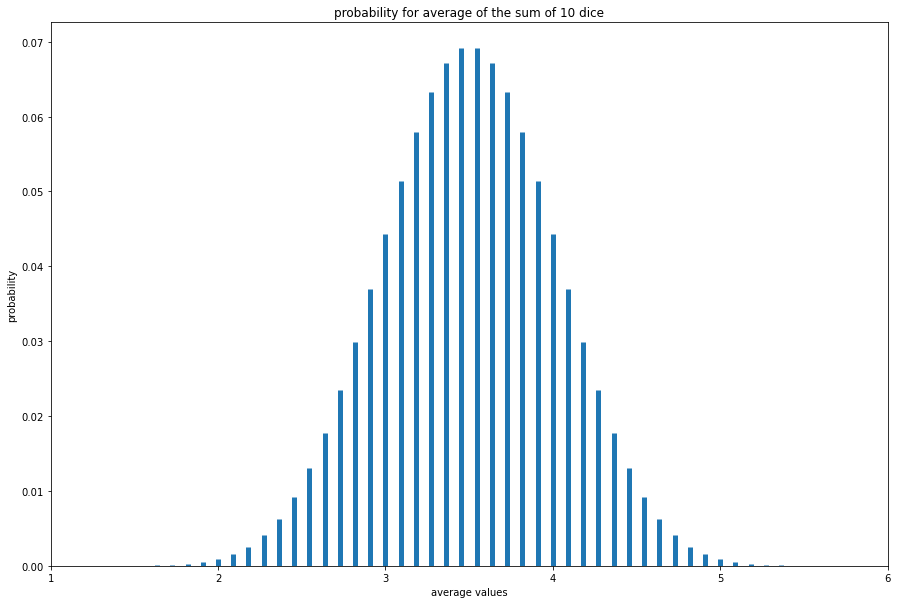

In [31]:
avgPros = pros
for i in range(10):
    avgPros = np.convolve(pros, avgPros)

allValues = np.linspace(1, 6, len(avgPros)) #all possible values of the average
#graph the average of 10 dice
plt.vlines(allValues, 0, avgPros, linewidth=5);
plt.xlim(1, 6)
plt.ylim(0)
plt.title("probability for average of the sum of 10 dice")
plt.xlabel("average values")
plt.ylabel("probability")

I think it is not the Guassian distribution. According to the definition of the Guassian distribution, it should be a continous probability distribution. Here, we only have ten dices to average, then the average values cannot be considered as continous. Instead, the values are discrete. 
However, when the number of dice is large enough, then we can consider this distribution as the Guassian distribution.

# problem 5

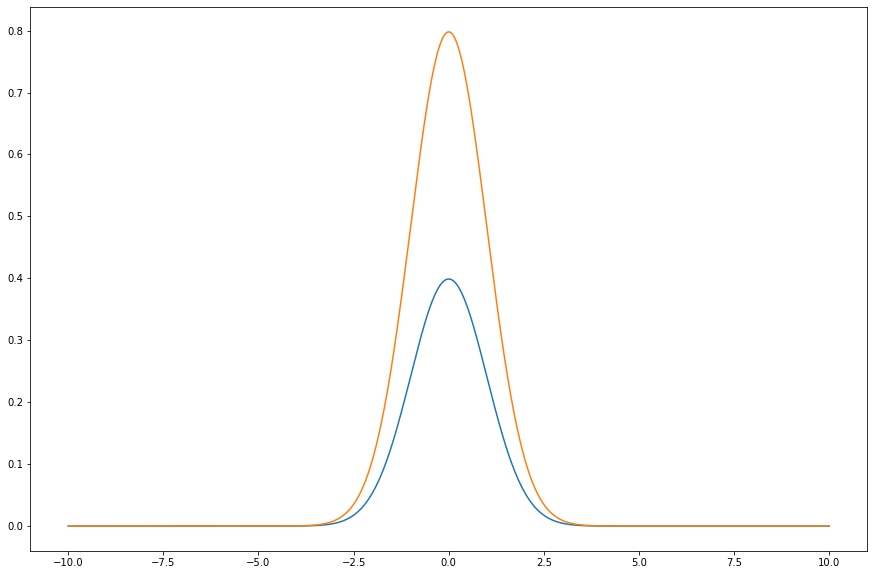

In [32]:
dist = stats.norm()
x = np.linspace(-10, 10, 1000)
fig, ax1 = plt.subplots(1, 1)#the graph of the sum of Guassian
ax1.plot(x, dist.pdf(x))
ax1.plot(x, dist.pdf(x) + dist.pdf(x))


The peak is around the 0.4 is the inital pdf.
From the graph, we can find out the sum is still Guassian.

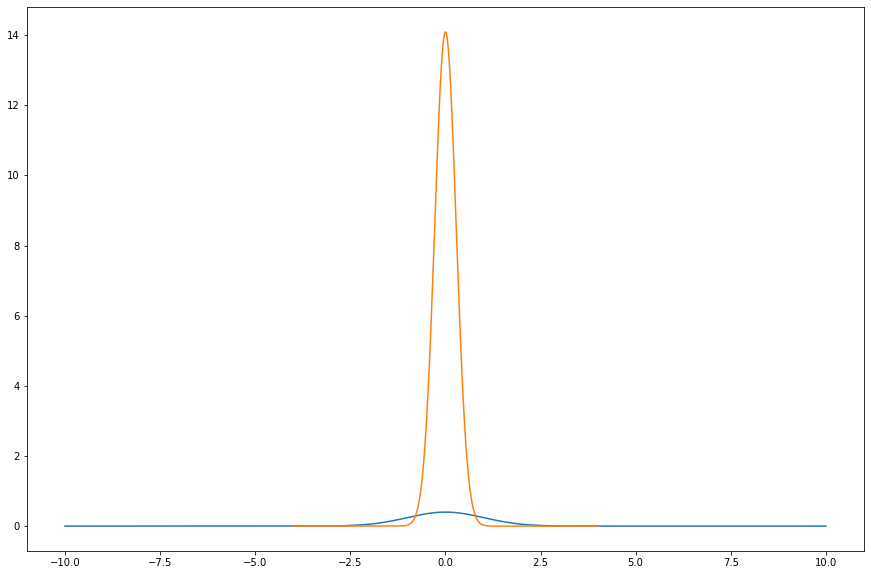

In [33]:
fig, ax2 = plt.subplots(1, 1)#the graph of the average of Guassian
ax2.plot(x, dist.pdf(x))
avg = np.convolve(dist.pdf(x), dist.pdf(x))
ax2.plot(np.linspace(-4, 4, len(avg)), avg)

The peak is around 0.4 is initial Guassian pdf.
From the graph, we can see the convolution is still the Guassian distribution.

Now, we come to the standard derivation part. The semi-log plot will help us have more explicit version of sd.

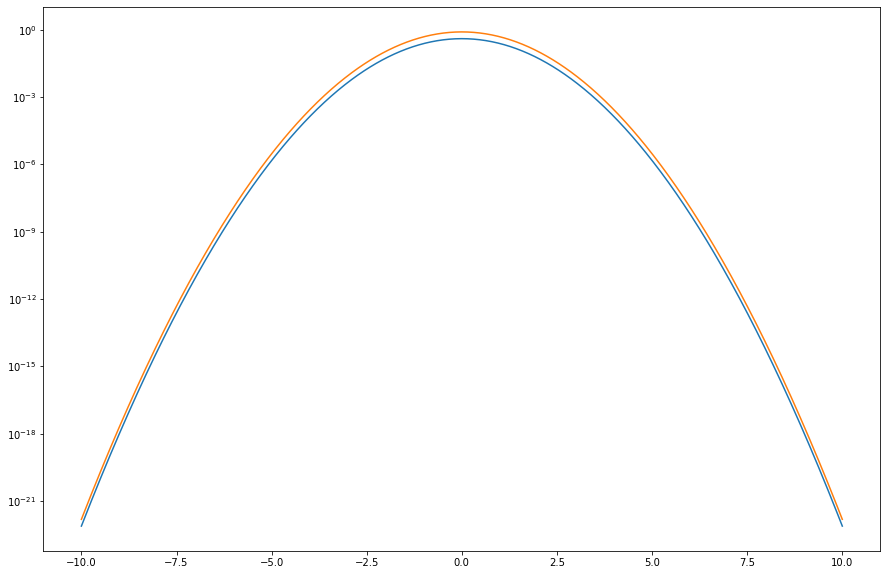

In [34]:
fig, ax3 = plt.subplots(1,1) #the semi-log graph of the sum
ax3.plot(x, dist.pdf(x))
ax3.plot(x, dist.pdf(x)+dist.pdf(x))
plt.yscale('log')

From the graph, we find the standard deviation remain unchanged here.

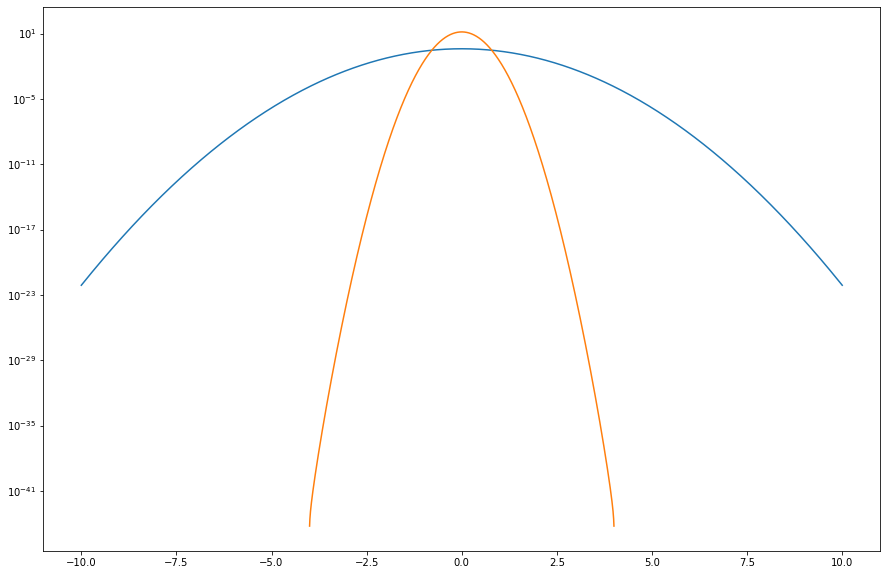

In [35]:
fig, ax4 = plt.subplots(1,1) #the semi-log graph of the average
ax4.plot(x, dist.pdf(x))
ax4.plot(np.linspace(-4, 4, len(avg)), avg)
plt.yscale('log')

The blue line is the initial one, then the orange line is the average one
From the graph, we can easily find out that the standard deviation is getting smaller. Then, the measurement becomes more precise. This method also applies when integrate the signal, when we do that, the standard deviation is getting smaller. 